In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LFW_X_df, get_y_df, data_prep
from model_arch import build_LFW_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.15.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.15.0
Tensorflow version: 2.15.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.15.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
data_filepath = "../../../data/csv/EXP1&2DATA.csv"
checkpoint_filepath = "../../../model_weights/regression/LFW"

In [5]:
callback = create_callback(
    checkpoint_filepath
)

In [6]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

65.95774617067835

In [7]:
df.tail()

,date,plant_id,tray_id,LFW_g,LDW_g,LA_mm2,manual_height_cm,area,perimeter,width,...,G_channel,B_channel,H_channel,S_channel,V_channel,height_cm_max,height_cm_mode,e_minoraxis,e_majoraxis,e_eccentricity
452,29-Jun,24,6,16.72,1.22,250.754,7.4,9575.5,652.055911,128,...,76,38,31,135,77,6.1,5.2,114.264679,134.337616,0.525848
453,29-Jun,25,6,19.09,1.56,306.960,7.7,9380.0,550.617312,152,...,75,37,33,139,75,5.1,4.2,107.612495,142.436798,0.655137
454,29-Jun,26,6,8.79,0.81,152.214,7.5,5789.0,434.818322,85,...,77,41,36,129,77,5.1,4.6,76.064171,114.750618,0.748739
455,29-Jun,27,6,18.71,1.42,302.190,7.5,10234.0,634.700572,155,...,73,32,33,152,73,6.9,5.4,113.188011,149.977432,0.656070
456,29-Jun,28,6,12.54,1.07,197.994,6.5,7710.0,535.528999,131,...,79,40,34,136,79,6.9,5.5,91.396469,129.623932,0.709118


In [8]:
X = get_LFW_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [9]:
model = build_LFW_model()
print('Input shape:', X_train[0].shape)


Input shape: (18,)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       

In [11]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/375

11/11 [==============================] - 1s 17ms/step - loss: 67.1774 - val_loss: 62.6500
Epoch 2/375
11/11 [==============================] - 0s 4ms/step - loss: 67.1443 - val_loss: 62.5671
Epoch 3/375
11/11 [==============================] - 0s 3ms/step - loss: 67.1111 - val_loss: 62.4807
Epoch 4/375
11/11 [==============================] - 0s 3ms/step - loss: 67.0780 - val_loss: 62.4122
Epoch 5/375
11/11 [==============================] - 0s 3ms/step - loss: 67.0447 - val_loss: 62.3426
Epoch 6/375
11/11 [==============================] - 0s 3ms/step - loss: 67.0115 - val_loss: 62.2782
Epoch 7/375
11/11 [==============================] - 0s 3ms/step - loss: 66.9782 - val_loss: 62.2159
Epoch 8/375
11/11 [==============================] - 0s 3ms/step - loss: 66.9448 - val_loss: 62.1598
Epoch 9/375
11/11 [==============================] - 0s 3ms/step - loss: 66.9113 - val_loss: 62.1001
Epoch 10/375
11/11 [==============================] - 0s 3ms/step - loss: 66.8777 - val_l

In [12]:
model.save(checkpoint_filepath)

INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW\assets


INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW\assets


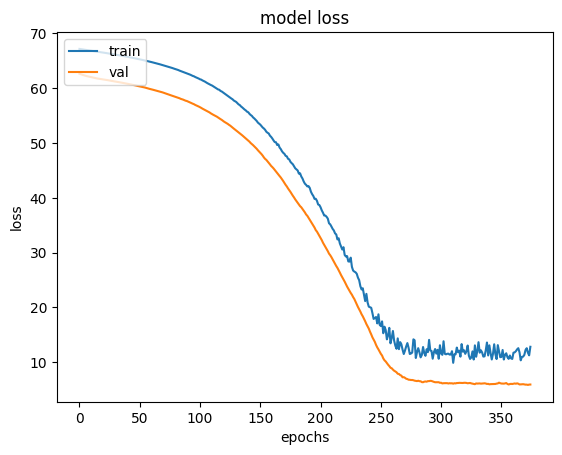

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 4.7147


4.714728355407715

In [15]:
figures_filepath = "../../../figures/LFW_error_csv"
generate_csv(model, X_test, y_test, "LFW_predictions", "LFW_actual", figures_filepath)

2/2 [==============================] - 0s 2ms/step
